In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.filterwarnings(action='ignore')

Data Import

In [2]:
import matplotlib as mpl 
%matplotlib inline
# 한글폰트 사용
mpl.rc('font', family='Malgun Gothic')
mpl.rc('axes', unicode_minus=False)

In [3]:
df=pd.read_csv('clustering/gn_total_v2.csv')
df.columns
df

Index(['city', '공원', '경찰서', '경찰공무원 1명당 담당 주민수', '고령화예산', '노인복지사업예산비중',
       '노인 1인당 노인복지 예산 (천원)', '단독주택', '아파트', '연립주택', '다세대주택', '거주_기타',
       '100만원미만', '100~200', '200~300', '300~400', '400~500', '500~600',
       '600~700', '700만원 이상', 'silver_hall', 'jobforpay', 'ratio_old',
       'stress', 'melancholy', 'poor_60', 'infra', 'station'],
      dtype='object')

,city,공원,경찰서,경찰공무원 1명당 담당 주민수,고령화예산,노인복지사업예산비중,노인 1인당 노인복지 예산 (천원),단독주택,아파트,연립주택,...,600~700,700만원 이상,silver_hall,jobforpay,ratio_old,stress,melancholy,poor_60,infra,station
0,합천군,6,19,275.634146,42.5,31.4,"2,032",87.6,7.5,2.5,...,0.8,0.4,1,6781,41.5,12.4,1.0,8781.0,76,350
1,함양군,33,8,293.607407,49.3,32.0,"2,074",82.3,9.4,0.3,...,0.8,1.6,5,5236,35.0,22.1,5.9,6780.5,70,293
2,함안군,47,11,408.074534,42.1,40.8,"2,765",78.0,17.5,2.6,...,0.8,2.3,1,6468,27.2,15.2,2.2,8375.5,73,397
3,하동군,27,10,304.405229,45.0,42.0,"2,943",84.4,9.4,3.8,...,0.8,1.9,4,6114,36.9,10.2,1.7,7917.0,80,308
4,통영시,60,11,521.444444,61.0,27.5,"2,296",25.8,63.8,2.6,...,2.4,2.1,4,10201,21.6,19.7,12.0,13210.5,194,429
5,창원시,436,38,620.023739,823.2,44.9,"2,507",34.6,61.3,1.9,...,2.6,6.6,39,61995,16.3,18.8,5.7,80283.0,"1,429",2167
6,창녕군,42,8,384.759259,8.2,24.5,"2,121",71.4,15.1,1.9,...,0.5,2.4,2,7563,33.1,1.3,1.0,9794.5,108,302
7,진주시,169,14,666.667946,213.3,29.8,"2,057",52.5,42.0,4.0,...,2.4,4.2,18,23823,18.2,19.6,5.6,30851.0,573,938
8,의령군,31,8,192.680851,40.2,53.7,"3,087",80.5,9.4,8.6,...,0.8,1.4,0,3893,38.2,14.9,8.9,5041.5,49,308
9,양산시,236,12,829.217494,90.7,45.5,"3,042",24.8,72.0,2.5,...,2.1,2.5,8,20070,15.0,5.0,8.8,25990.0,508,621


In [4]:
df = df.iloc[:, 1:]
df

,공원,경찰서,경찰공무원 1명당 담당 주민수,고령화예산,노인복지사업예산비중,노인 1인당 노인복지 예산 (천원),단독주택,아파트,연립주택,다세대주택,...,600~700,700만원 이상,silver_hall,jobforpay,ratio_old,stress,melancholy,poor_60,infra,station
0,6,19,275.634146,42.5,31.4,"2,032",87.6,7.5,2.5,1.5,...,0.8,0.4,1,6781,41.5,12.4,1.0,8781.0,76,350
1,33,8,293.607407,49.3,32.0,"2,074",82.3,9.4,0.3,5.2,...,0.8,1.6,5,5236,35.0,22.1,5.9,6780.5,70,293
2,47,11,408.074534,42.1,40.8,"2,765",78.0,17.5,2.6,1.0,...,0.8,2.3,1,6468,27.2,15.2,2.2,8375.5,73,397
3,27,10,304.405229,45.0,42.0,"2,943",84.4,9.4,3.8,2.0,...,0.8,1.9,4,6114,36.9,10.2,1.7,7917.0,80,308
4,60,11,521.444444,61.0,27.5,"2,296",25.8,63.8,2.6,7.3,...,2.4,2.1,4,10201,21.6,19.7,12.0,13210.5,194,429
5,436,38,620.023739,823.2,44.9,"2,507",34.6,61.3,1.9,0.6,...,2.6,6.6,39,61995,16.3,18.8,5.7,80283.0,"1,429",2167
6,42,8,384.759259,8.2,24.5,"2,121",71.4,15.1,1.9,7.9,...,0.5,2.4,2,7563,33.1,1.3,1.0,9794.5,108,302
7,169,14,666.667946,213.3,29.8,"2,057",52.5,42.0,4.0,1.5,...,2.4,4.2,18,23823,18.2,19.6,5.6,30851.0,573,938
8,31,8,192.680851,40.2,53.7,"3,087",80.5,9.4,8.6,1.1,...,0.8,1.4,0,3893,38.2,14.9,8.9,5041.5,49,308
9,236,12,829.217494,90.7,45.5,"3,042",24.8,72.0,2.5,0.7,...,2.1,2.5,8,20070,15.0,5.0,8.8,25990.0,508,621


In [7]:
#df= df[df.columns.difference(['alone_household']) ]
#df

In [8]:
#import matplotlib.pyplot as plt

#import seaborn as sns


#sns.pairplot(df,kind='reg',markers='+')

Normalizing the data

StandardizationPermalink
- Standardization dataset with (mean=0, variance=1) scale is necessary as it removes the biases in the original variables. 
    For example, when the data for each variable is collected on different units.
- The standardized variables will be unitless and have a similar variance.
- Standardization is an advisable method for data transformation when the variables in the original dataset have been measured on a significantly different scale.
- At some cases, the dataset needs not to be standardized as the original variation in the dataset is important (Gewers et al., 2018)


In [9]:
# 우리 데이터는 이상치가 있어 영향을 줄이기 위해 RobustScaler 사용
#from sklearn.preprocessing import RobustScaler

#std_df = RobustScaler().fit_transform(df)
#std_df = pd.DataFrame(std_df, index=df.index, columns=df.columns)
#std_df.head()

In [11]:
std_df.shape

(18, 27)

In [12]:
from sklearn.decomposition import PCA

nc = 10

pca = PCA(n_components=nc)
pca_array = pca.fit_transform(std_df)
pca_df = pd.DataFrame(pca_array, index=df.index,
                      columns=[f"pca{num+1}" for num in range(nc)])
pca_df

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10
0,-3.793101,2.143333,0.772616,0.640955,0.200989,-0.346337,1.238052,0.481264,1.310877,-0.018227
1,-2.411270,1.050820,2.735663,0.794070,1.053535,1.371321,-0.361293,-0.392207,-0.855469,-0.196600
2,-2.403323,0.759379,-0.378337,0.637227,-0.042027,0.215180,0.484010,0.441342,-0.117508,-0.359515
3,-2.716879,0.450577,-0.524681,-0.159928,-0.582264,-0.694974,0.214595,-0.140823,-0.398400,0.289103
4,1.434271,-2.028372,2.814455,0.869530,1.990400,-0.791324,-0.070806,-0.236965,0.789121,0.113039
5,9.564927,5.868859,-0.652477,-0.435894,-0.062716,-0.356101,-0.881079,-0.091129,0.280606,-0.007176
6,-2.331735,0.701277,4.009759,-0.672493,-1.859841,0.280989,-0.987112,0.816083,-0.080323,0.113527
7,3.777652,0.579312,1.103887,1.014398,-0.018336,-0.933699,1.913759,-0.429459,-0.811559,-0.121894
8,-3.504116,-0.150951,-2.474513,2.870835,-0.688812,-1.544915,-1.045898,0.131372,-0.385545,-0.389246
9,4.068040,-2.405750,-0.503017,-1.252906,-0.700661,-0.071724,0.702904,1.695428,-0.344780,0.028641


In [26]:
# pca_df.iloc[:,:2].to_excel("hkpca2.xlsx")

In [13]:
result = pd.DataFrame({'설명가능한 분산 비율(고윳값)':pca.explained_variance_,
             '기여율':pca.explained_variance_ratio_},
            index=np.array([f"pca{num+1}" for num in range(nc)]))
result['누적기여율'] = result['기여율'].cumsum()
result

,설명가능한 분산 비율(고윳값),기여율,누적기여율
pca1,14.905886,0.521399,0.521399
pca2,4.430180,0.154965,0.676364
pca3,3.005425,0.105128,0.781493
pca4,1.586474,0.055494,0.836986
pca5,1.071564,0.037483,0.874469
pca6,0.887432,0.031042,0.905511
pca7,0.760326,0.026596,0.932107
pca8,0.477600,0.016706,0.948813
pca9,0.384612,0.013454,0.962266
pca10,0.337772,0.011815,0.974082


누적 기여율 : PC1이 분석대상의 데이터가 가지고 있던 정보가 PC1 주성분에 집약되어 있는 크기

Scree plot 해석
- 꺽이는 지점 전까지는 각 주성분이 데이터에서 차지하는 비중이 큰데, 꺽이는 지점 이후에는 주성분을 포함시켜도 차지하는 비중이 현저하게 적어진다. 그래서 보통 꺽이는 지점까지만 주성분을 포함시켜서 데이터를 표현하도록 결정

<AxesSubplot:>

Text(0.5, 1.0, 'Scree plot')

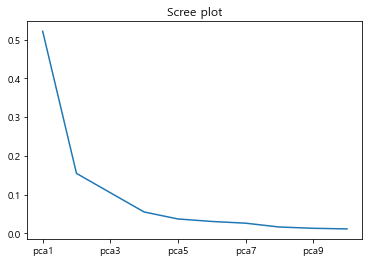

In [14]:
result['기여율'].plot.line()
plt.title('Scree plot')

<AxesSubplot:>

Text(0.5, 1.0, '누적기여율')

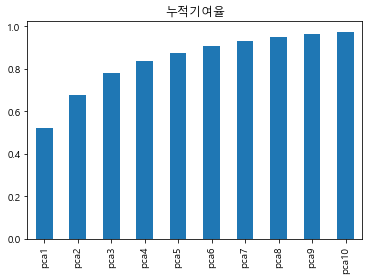

In [15]:
result['누적기여율'].plot.bar()
plt.title('누적기여율')

In [16]:
pca_out = PCA().fit(std_df)


pca_out.explained_variance_ratio_
np.cumsum(pca_out.explained_variance_ratio_)

array([5.21399319e-01, 1.54965144e-01, 1.05128048e-01, 5.54939584e-02,
       3.74826980e-02, 3.10418728e-02, 2.65957701e-02, 1.67061738e-02,
       1.34535143e-02, 1.18150627e-02, 9.30292012e-03, 6.69737065e-03,
       3.87862285e-03, 2.95338804e-03, 1.88740176e-03, 7.71942042e-04,
       4.26794584e-04, 7.39446238e-34])

array([0.52139932, 0.67636446, 0.78149251, 0.83698647, 0.87446917,
       0.90551104, 0.93210681, 0.94881298, 0.9622665 , 0.97408156,
       0.98338448, 0.99008185, 0.99396047, 0.99691386, 0.99880126,
       0.99957321, 1.        , 1.        ])

In [17]:
loadings = pca_out.components_
num_pc = pca_out.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = df.columns.values
loadings_df = loadings_df.set_index('variable')
loadings_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18
variable,,,,,,,,,,,,,,,,,,
공원,0.253498,0.084511,-0.077010,0.020044,-0.033081,0.057876,-0.079534,0.212253,-0.069813,0.157804,0.043257,-0.162752,-0.051620,-0.063355,-0.020563,0.177584,0.510052,-0.277676
경찰서,0.182905,0.302393,-0.086009,0.053504,0.030631,0.064662,-0.017630,0.043797,0.497523,0.062698,0.137059,-0.023484,-0.379785,-0.150878,-0.194829,-0.164149,0.134296,0.131814
경찰공무원 1명당 담당 주민수,0.230045,-0.156858,0.041069,-0.126641,0.038892,0.006977,0.195719,0.367632,-0.099721,-0.144495,0.246468,-0.045105,0.181403,-0.005920,0.035179,-0.373353,-0.274685,0.195949
고령화예산,0.196328,0.311193,-0.052350,0.002306,0.007385,-0.115105,-0.149246,-0.049757,0.085595,0.015866,-0.085790,0.035814,0.035870,0.226302,0.209654,0.270836,-0.536854,-0.191338
노인복지사업예산비중,0.008167,-0.117892,-0.508339,-0.199559,0.057593,0.090114,-0.362458,-0.171165,-0.083603,-0.080916,-0.051430,-0.151626,-0.080655,0.296051,-0.480225,-0.233706,-0.051525,0.033811
노인 1인당 노인복지 예산 (천원),-0.000214,-0.191957,-0.476236,-0.118420,-0.107784,0.143565,-0.350184,-0.025043,-0.080993,0.163140,0.230585,0.354276,-0.081551,-0.209043,0.495289,0.051500,-0.040553,0.031720
단독주택,-0.228188,0.196040,-0.102229,-0.012750,-0.059731,0.136316,0.078890,-0.181946,-0.158483,0.176142,0.092553,-0.219360,0.187346,-0.201769,-0.122857,0.018083,-0.095876,-0.158113
아파트,0.234100,-0.188411,0.049014,-0.027638,0.092013,-0.090095,-0.006031,0.189961,0.174868,-0.200027,-0.083201,0.198982,-0.177697,0.205687,0.122703,0.036545,0.084809,-0.440992
연립주택,0.004869,-0.109860,-0.160955,0.518441,-0.369105,-0.602751,-0.102074,-0.021806,-0.072636,-0.203106,-0.064489,0.048024,-0.078940,-0.248173,-0.087994,-0.127261,-0.010450,0.020470


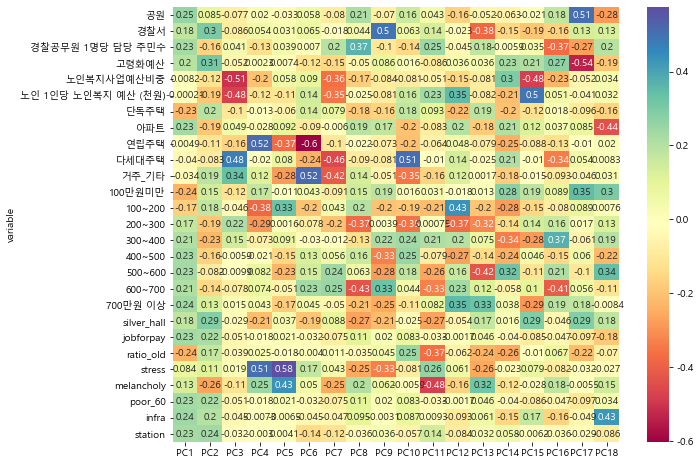

In [18]:
plt.rcParams["figure.figsize"] = (10,8)
ax = sns.heatmap(loadings_df, annot=True, cmap='Spectral')
plt.show()

In [ ]:
# bi plot 그리기

In [19]:
df.head(2)

,공원,경찰서,경찰공무원 1명당 담당 주민수,고령화예산,노인복지사업예산비중,노인 1인당 노인복지 예산 (천원),단독주택,아파트,연립주택,다세대주택,...,600~700,700만원 이상,silver_hall,jobforpay,ratio_old,stress,melancholy,poor_60,infra,station
0,6,19,275.634146,42.5,31.4,2032,87.6,7.5,2.5,1.5,...,0.8,0.4,1,6781,41.5,12.4,1.0,8781.0,76,350
1,33,8,293.607407,49.3,32.0,2074,82.3,9.4,0.3,5.2,...,0.8,1.6,5,5236,35.0,22.1,5.9,6780.5,70,293


In [20]:
from sklearn.decomposition import PCA

nc = 3

pca = PCA(n_components=nc)
pca_array = pca.fit_transform(std_df)
pca_df = pd.DataFrame(pca_array, index=df.index,
                      columns=[f"pca{num+1}" for num in range(nc)])
pca_df

,pca1,pca2,pca3
0,-3.793101,2.143333,0.772616
1,-2.411270,1.050820,2.735663
2,-2.403323,0.759379,-0.378337
3,-2.716879,0.450577,-0.524681
4,1.434271,-2.028372,2.814455
5,9.564927,5.868859,-0.652477
6,-2.331735,0.701277,4.009759
7,3.777652,0.579312,1.103887
8,-3.504116,-0.150951,-2.474513
9,4.068040,-2.405750,-0.503017


In [22]:
#print(std_df.shape)
#print(x_pca.shape)

Text(0.5, 0, 'pca1')

Text(0.5, 0, 'pca2')

Text(0.5, 0, 'pca3')

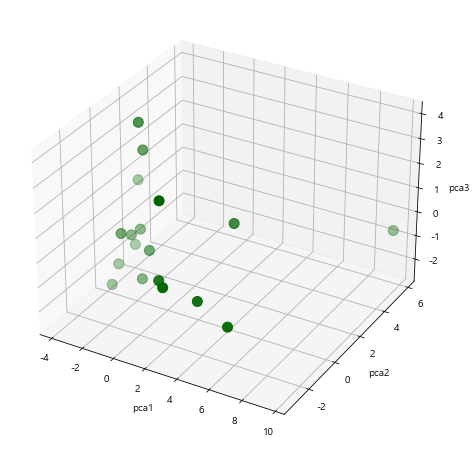

In [63]:
  import matplotlib.pyplot as plt
  import numpy as np
  # 3차원 그래프를 그리기 위해서 from mpl_toolkits.mplot3d import Axes3D를 추가해줍니다.
  from mpl_toolkits.mplot3d import Axes3D

  # 0 ~ 10 까지 랜덤으로 20개씩 생성
  x = x_pca[:,0]
  y = x_pca[:,1]
  z = x_pca[:,2]

  # figure 크기 설정
  # fig = plt.figure()만 사용해도 됨.
  fig = plt.figure(figsize=(10, 8))

  # 3D axes를 만들기 위해 projection=’3d’ 키워드를 입력해줍니다.
  ax = fig.gca(projection='3d')

  # scatter() 함수에 준비된 x, y, z 배열 값을 입력해주고 
  # 마커, 스타일 및 마커 색상 등을 설정할 수 있습니다.
  # marker = 점의 형태
  # s = 점의 크기
  # c = 점의 색깔
  ax.scatter(x,y,z, marker='o', s=100, c='darkgreen')
  ax.set_xlabel('pca1')
  ax.set_ylabel('pca2')
  ax.set_zlabel('pca3')
  plt.show()

행렬도(biplot)

 - 원변수와 PC간의 관계를 그래프로 표현
 - 화살표는 원변수와 PC의 상관계수. PC와 평행할수록 해당 PC에 큰 영향.
 - 화살표 벡터의 길이가 원변수의 분산을 표현

 pc1 축과 평행일수록 상관관계가 높고 roatation 값이 높다.
 pc2 축과 수직인 변수들은 별로 영향력이 없음을 의미한다.
 pc2 : 높이뛰기는 못하지만 장거리를 잘하는 선수들이라고 할 수 있다.

In [49]:
def biplot(score,coeff,y=None,labels=None):
    xs = score[:,0] # projection of PC1
    ys = score[:,1] # projection of PC2
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley, c = y)
    
    # aggiungo frecce
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')

    # aggiungo flag outliers
    for i in range(len(xs)):
        if ((xs[i]>np.quantile(xs,0.99)) | (ys[i]>np.quantile(xs,0.99))):
            plt.text(xs[i] * scalex,ys[i] * scaley, str(i))

    # etichette
    plt.xlabel("PC{}".format(1), size=14)
    plt.ylabel("PC{}".format(2), size=14)
    plt.grid()
    plt.tick_params(axis='both', which='both', labelsize=14)
    plt.tight_layout()

In [50]:
pca = PCA(n_components=3)
pca.fit(std_df)
x_pca = pca.transform(std_df)

PCA(n_components=3)

<Figure size 720x576 with 0 Axes>

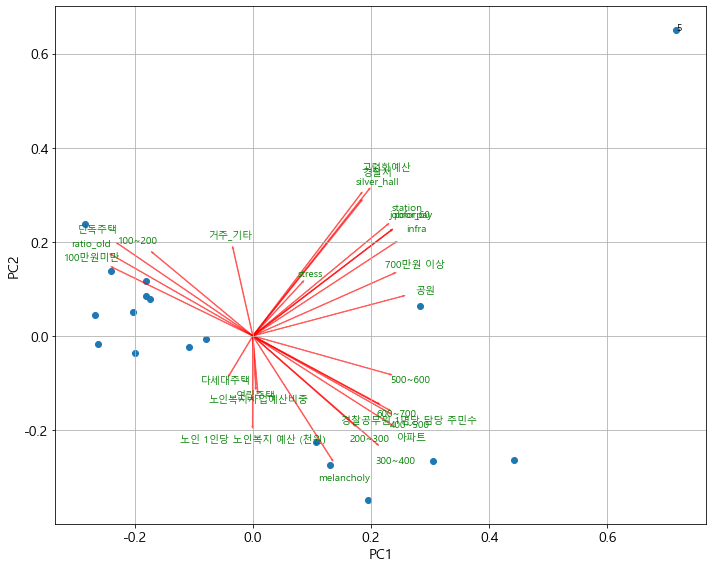

In [51]:
plt.figure(figsize=(10,8))
biplot(score=x_pca,coeff=np.transpose(pca.components_),labels=df.columns)